## **Data Description:**

**Context:**

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

**Attribute Information:**

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance.

**OBJECTIVES:**

     Exploratory Data Analysis
     Statistics using Python
     Hypothesis testing

# * IMPORT THE LIBRARIES *

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

import copy
%matplotlib inline

# * READING THE DATA *

In [3]:
# READING THE DATA AS A DATAFRAME

data = pd.read_csv("insurance.csv")

### a. Shape of the data

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# * MAKING EXPLORATORY DATA ANALYSIS(EDA) *

 1. Find the shape of the data,data type of individual columns
 2. Check the presence of missing values
 3. Descriptive stats of numerical columns
 3. Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
 4. Distribution of categorical columns

### b. Data type of each attribute

In [7]:
# shape of the data (rows,columns)
data.shape

(1338, 7)

In [8]:
# DATA TYPE OF EACH ATTRIBURE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**The data has 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type(Strings in the column)**

### c. Checking the presence of missing values

In [10]:
# NULL VALUE CHECK
data.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [9]:
# CHECK FOR MISSING VALUES
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.isna().any().sum()

0

**THERE IS 0 MISSING VALUES**

### d. 5 point summary of numerical attributes

In [12]:
# USING describe().T function to see the summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* **Data looks legit as all the statistics seem reasonable**
* **Looking at the age column, data looks representative of the true age distribution of the adult population**
* **Very few people have more than 2 children. 75% of the people have 2 or less children**
* **The claimed amount is higly skewed as most people would require basic medi-care and only few suffer
    from diseases which cost more to get rid of**

### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 

Text(0.5, 0, 'CHARGES')

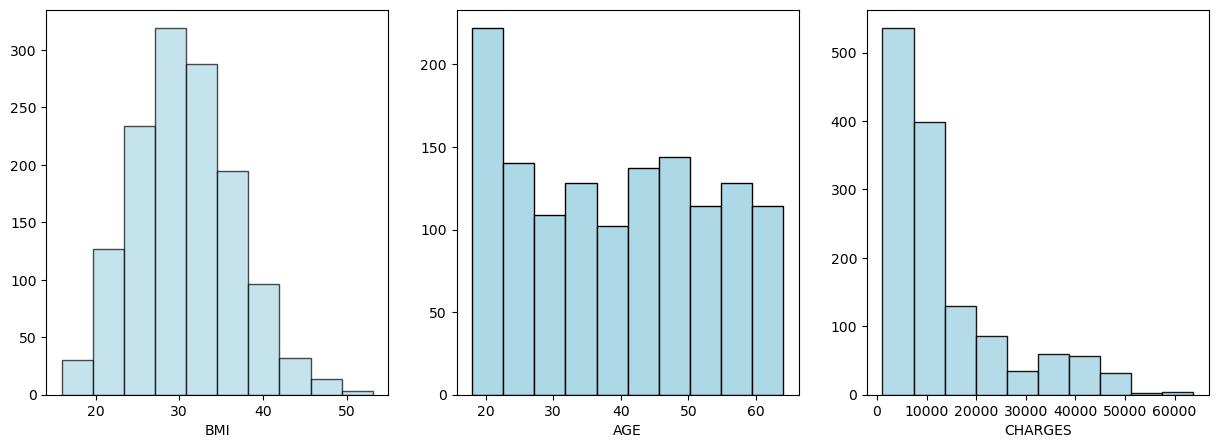

In [34]:
# PLOTTING THE DISTRIBUTION 

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(data.bmi, color="lightblue", edgecolor="black", alpha = 0.7)
plt.xlabel('BMI')

plt.subplot(1,3,2)
plt.hist(data.age, color="lightblue", edgecolor="black", alpha = 1)
plt.xlabel('AGE')

plt.subplot(1,3,3)
plt.hist(data.charges, color="lightblue", edgecolor="black", alpha = 0.9)
plt.xlabel('CHARGES')

- **BMI looks normally distributed**
- **AGE is uniformly distributed**
- **CHARGES are highly skewed**

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

In [35]:
# MEASURING THE SKEWNESS OF BMI, AGE and CHARGES

skew = pd.DataFrame({'Skewness' : [stats.skew(data.bmi),stats.skew(data.age),stats.skew(data.charges)]},
                    index=['bmi','age','charges'])
skew

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


- Skew of bmi is very less as seen in the previous step
- age is uniformly distributed and there's hardly any skew
- charges are highly skewed

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

<Axes: xlabel='charges'>

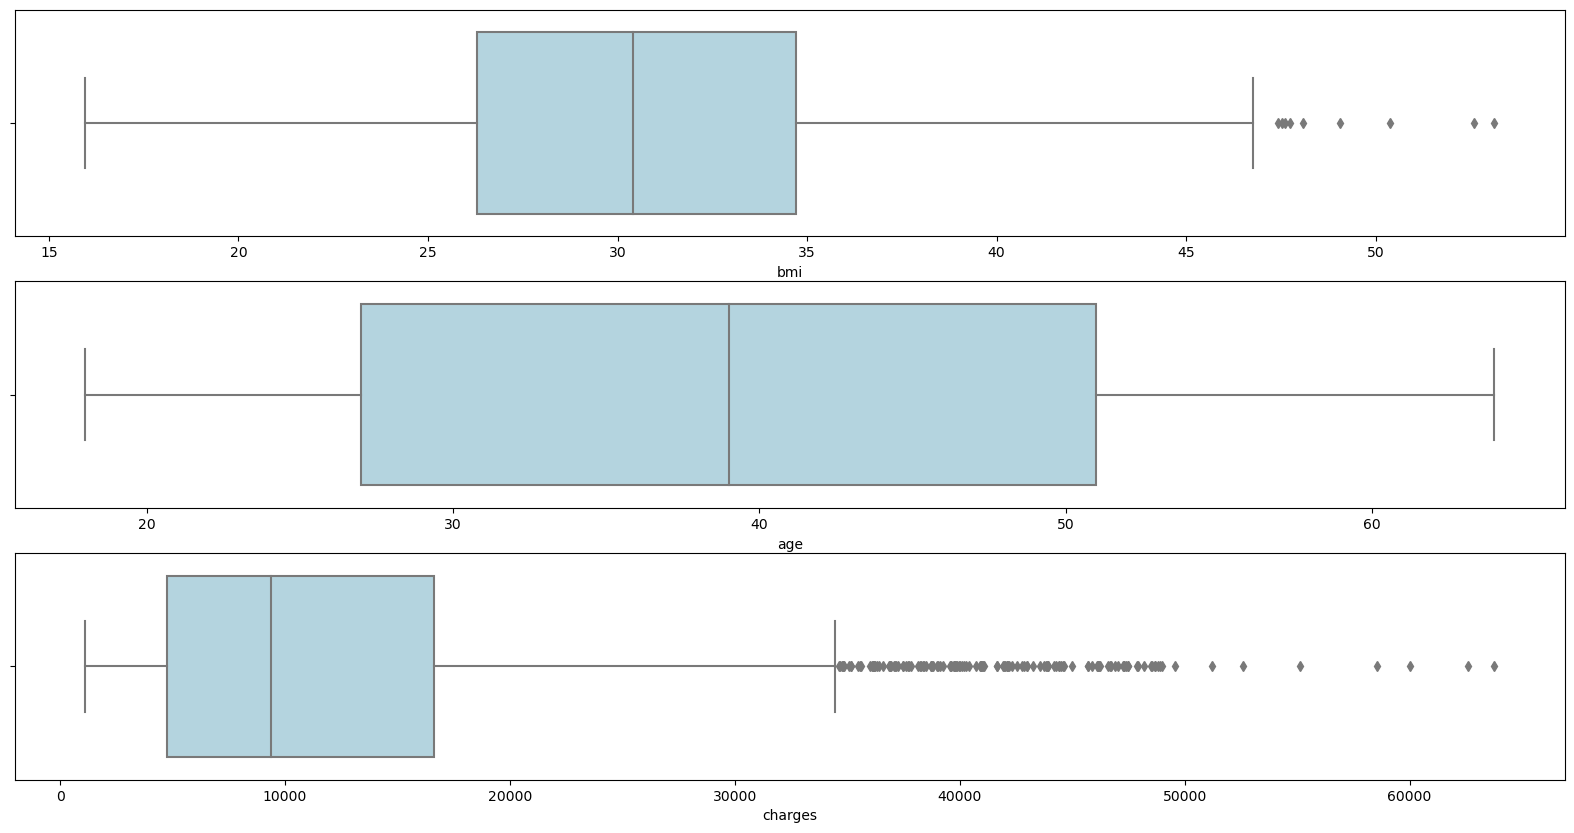

In [39]:
# CHECKING THE OUTLIERS USING SEABORN
plt.figure(figsize = (20,10))
plt.subplot(3,1,1)
sns.boxplot(x = data.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x = data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x = data.charges, color='lightblue')

* **BMI has few outliers**
* **AGE has 0 outliers**
* **CHARGES has alot of outliers**

### h. Distribution of categorical columns (include children) 

In [43]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'CHILDREN DISTRIBUTION')

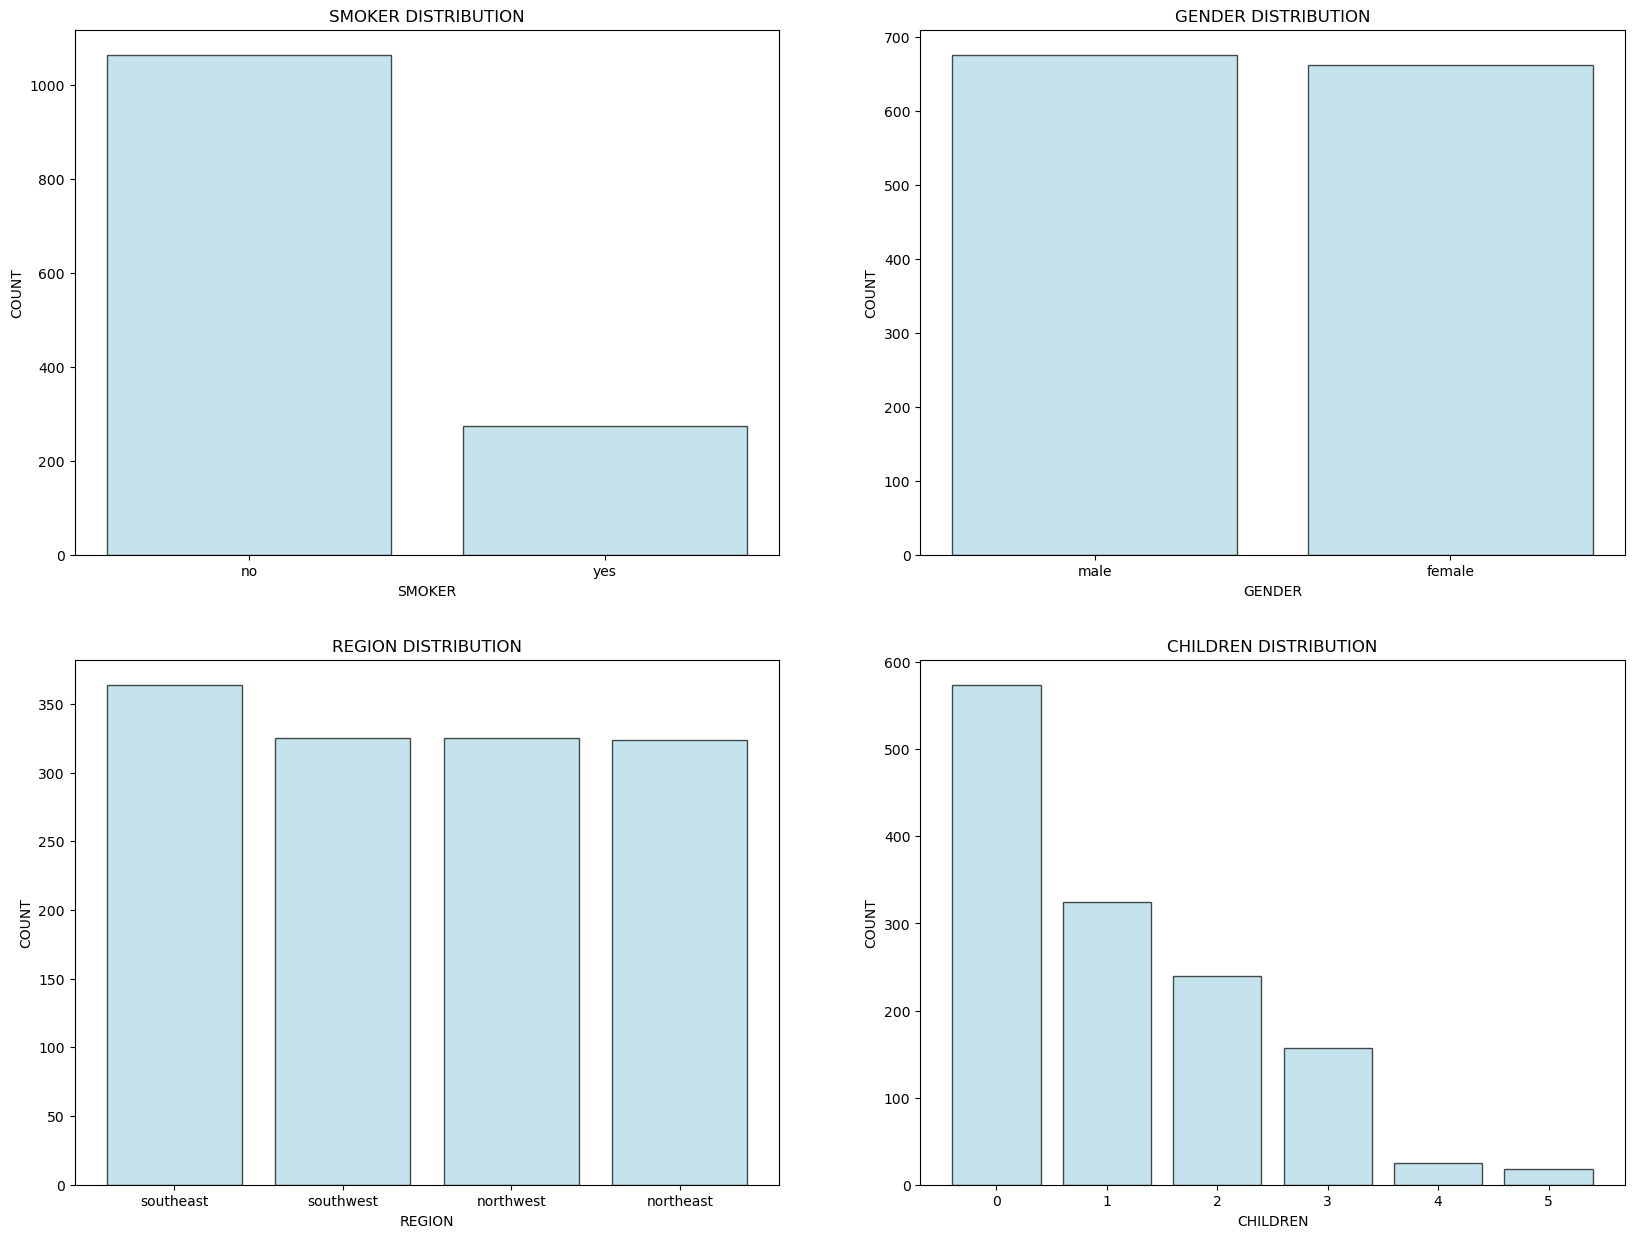

In [49]:
#PLOTTING THE DISTRIBUTIONS

plt.figure(figsize=(20,15))

# VALUES OF X-AXIS
x = data.smoker.value_counts().index
# COUNTS OF EACH CLASS IN Y-AXIS
y = [data['smoker'].value_counts()[i] for i in x]

plt.subplot(2,2,1)
plt.bar(x,y,align='center', color = 'lightblue', edgecolor='black', alpha = 0.7)
plt.xlabel('SMOKER')
plt.ylabel('COUNT')
plt.title('SMOKER DISTRIBUTION')

# VALUES OF X-AXIS
x1 = data.sex.value_counts().index
# COUNTS OF EACH CLASS IN Y-AXIS
y1 = [data['sex'].value_counts()[j] for j in x1]

plt.subplot(2,2,2)
plt.bar(x1,y1,align='center', color = 'lightblue', edgecolor='black', alpha = 0.7)
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.title('GENDER DISTRIBUTION')

# VALUES OF X-AXIS
x2 = data.region.value_counts().index
# COUNTS OF EACH CLASS IN Y-AXIS
y2 = [data['region'].value_counts()[l] for l in x2]

plt.subplot(2,2,3)
plt.bar(x2,y2,align='center', color = 'lightblue', edgecolor='black', alpha = 0.7)
plt.xlabel('REGION')
plt.ylabel('COUNT')
plt.title('REGION DISTRIBUTION')

# VALUES OF X-AXIS
x3 = data.children.value_counts().index
# COUNTS OF EACH CLASS IN Y-AXIS
y3 = [data['children'].value_counts()[o] for o in x3]

plt.subplot(2,2,4)
plt.bar(x3,y3,align='center', color = 'lightblue', edgecolor='black', alpha = 0.7)
plt.xlabel('CHILDREN')
plt.ylabel('COUNT')
plt.title('CHILDREN DISTRIBUTION')

#### **THE GRAPH SHOWS**

- **THERE ARE MORE NON-SMOKERS THAN SMOKERS**
- **GENDER IS EVENLY DISTRIBUTED**
- **REGION IS EVENLY DISTRIBUTED**
- **IN THE CHILDREN DISTRIBUTION IT SHOWS THAT INDIVIDUALS HAVE LESS THAN 2 CHILDREN AND FEW HAVE 4 or 5 CHILDREN**

### i. Pair plot that includes all the columns of the data frame

C:\Users\CJay\AppData\Local\Temp\ipykernel_8280\240979447.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_encoded.loc[:,['sex', 'smoker','region']] = data_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)


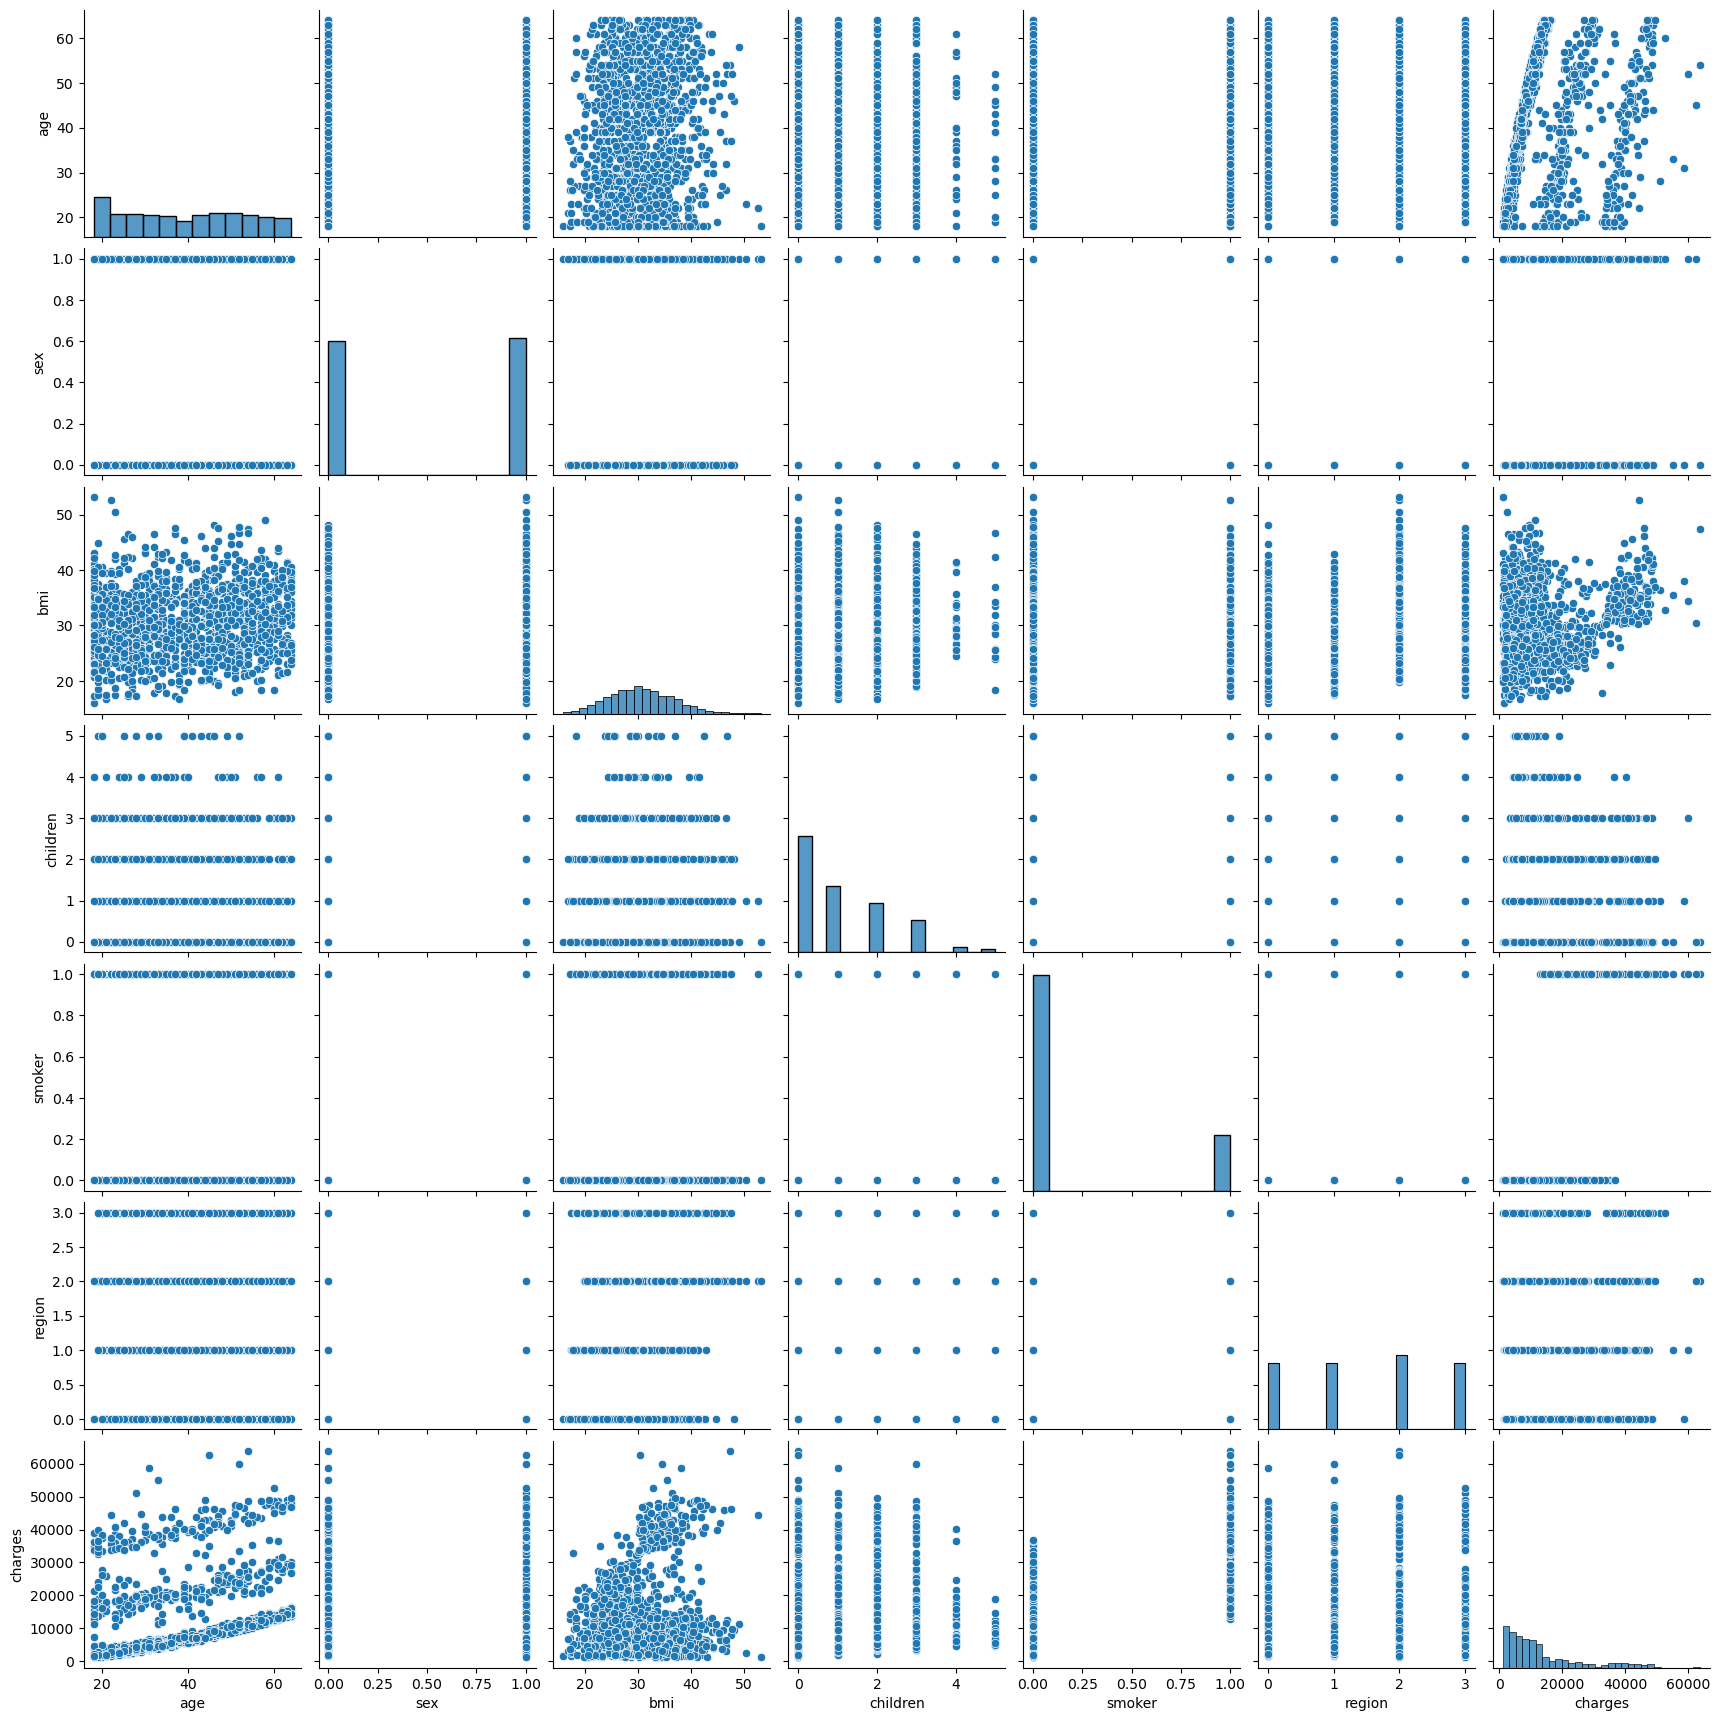

In [52]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings

from sklearn.preprocessing import LabelEncoder

data_encoded = copy.deepcopy(data)
data_encoded.loc[:,['sex', 'smoker','region']] = data_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(data_encoded)  #pairplot
plt.show()

In [54]:
data,data_encoded

(      age     sex     bmi  children smoker     region      charges
 0      19  female  27.900         0    yes  southwest  16884.92400
 1      18    male  33.770         1     no  southeast   1725.55230
 2      28    male  33.000         3     no  southeast   4449.46200
 3      33    male  22.705         0     no  northwest  21984.47061
 4      32    male  28.880         0     no  northwest   3866.85520
 ...   ...     ...     ...       ...    ...        ...          ...
 1333   50    male  30.970         3     no  northwest  10600.54830
 1334   18  female  31.920         0     no  northeast   2205.98080
 1335   18  female  36.850         0     no  southeast   1629.83350
 1336   21  female  25.800         0     no  southwest   2007.94500
 1337   61  female  29.070         0    yes  northwest  29141.36030
 
 [1338 rows x 7 columns],
       age  sex     bmi  children  smoker  region      charges
 0      19    0  27.900         0       1       3  16884.92400
 1      18    1  33.770       

- **The only obvious correlation of 'charges' is with 'smoker'**
- **Looks like smokers claimed more money than non-smokers**
- **There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones**


# Answer the following questions with statistical evidence

a. Do charges of people who smoke differ significantly from the people who don't? 

b. Does bmi of males differ significantly from that of females? 

c. Is the proportion of smokers significantly different in different genders? 

d. Is the distribution of bmi across women with no children, one child and two children, the same? 

### a. Do charges of people who smoke differ significantly from the people who don't?

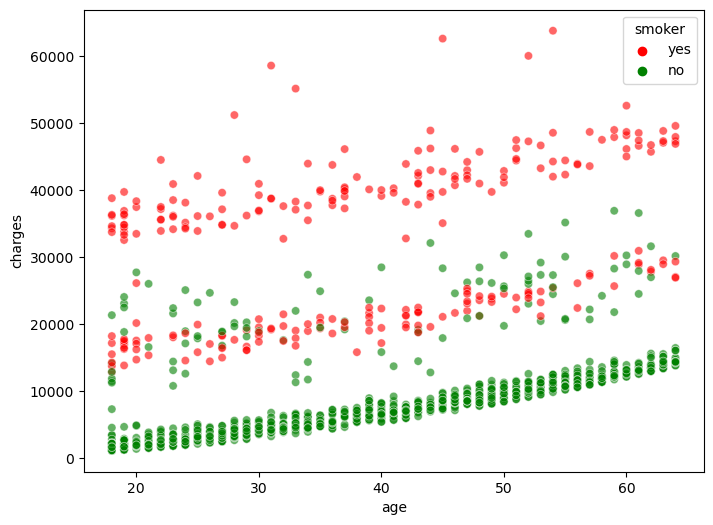

In [59]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages

plt.figure(figsize=(8,6))
sns.scatterplot(data = data, x="age",y="charges",hue="smoker",palette= ['red','green'] ,alpha=0.6)
plt.show()

**THE PLOT SHOWS THAT SMOKER CHARGES HIGHER THAN THE NON-SMOKERS**

### T-TEST

In [60]:
# T-test to check dependency of smoking on charges

# Stating the Null Hypothesis
Ho = "Charges of smoker and non-smoker are same " 
# Stating the Alternate Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"


# Selecting charges corresponding to smokers as an array
x = np.array(data[data.smoker == 'yes'].charges) 
# Selecting charges corresponding to non-smokers as an array
y = np.array(data[data.smoker == 'no'].charges)

#Performing an Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')    

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


In [61]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### b. Does bmi of males differ significantly from that of females?

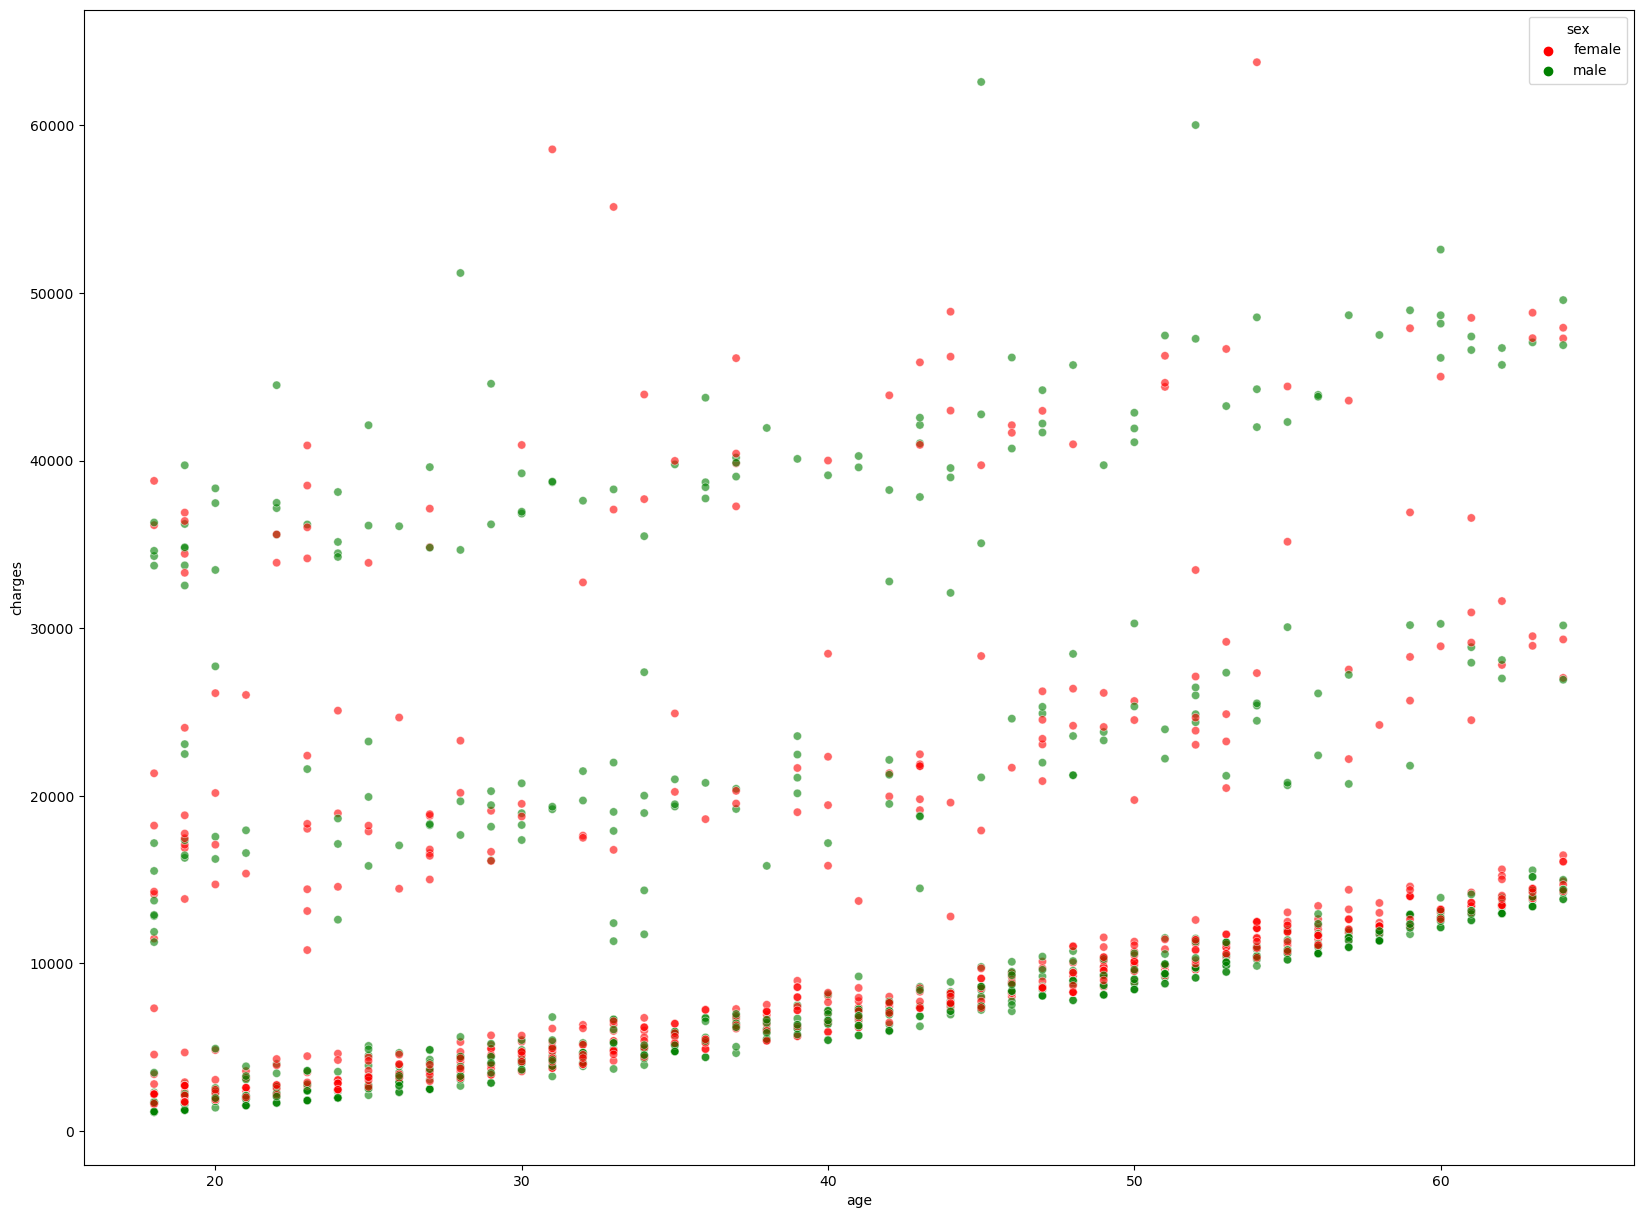

In [64]:
# USING SCATTERPLOT TO SEE THE DIFFERENCE

plt.figure(figsize=(20,15))
sns.scatterplot(data=data,x="age",y="charges",hue="sex",palette= ['red','green'] ,alpha=0.6)
plt.show()

**THE PLOT SHOWS THAT THERE IS NO RELATION BETWEEN GENDER AND CHARGES**

In [65]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(data[data.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(data[data.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


### c. Is the proportion of smokers significantly different in different genders?

In [66]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(data['sex'],data['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


* **THE DATA SHOWS THAT THERE ARE MORE MALE SMOKERS THAN FEMALE**

### d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [68]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_data = copy.deepcopy(data[data['sex'] == 'female'])

zero = female_data[female_data.children == 0]['bmi']
one = female_data[female_data.children == 1]['bmi']
two = female_data[female_data.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


* **BMI is not changed by the number of children a woman has**